Implement K-Nearest Neighbours’ algorithm on Social network ad dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, precision_score, recall_score

In [23]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [24]:
lb = LabelEncoder()
data['Gender'] = lb.fit_transform(data['Gender'])#Male = 1, Female = 0

In [25]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [26]:
X = data.drop(columns=['Purchased','User ID'])
y = data['Purchased']#target set

In [27]:
data.shape

(400, 5)

In [28]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
results = {}
for k in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[k] = accuracy
best_k = max(results, key=results.get)
print(f"Best K value : {best_k} and accuracy : {results[best_k]:.2f}")

Best K value : 3 and accuracy : 0.95


In [31]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)
y_final_pred = final_knn.predict(X_test_scaled)

In [32]:
final_accuracy = accuracy_score(y_test,y_final_pred)
print(f"Accuracy: {final_accuracy:.2f}")

Accuracy: 0.95


In [33]:
cm = confusion_matrix(y_test,y_final_pred)
print(cm)

[[55  3]
 [ 1 21]]


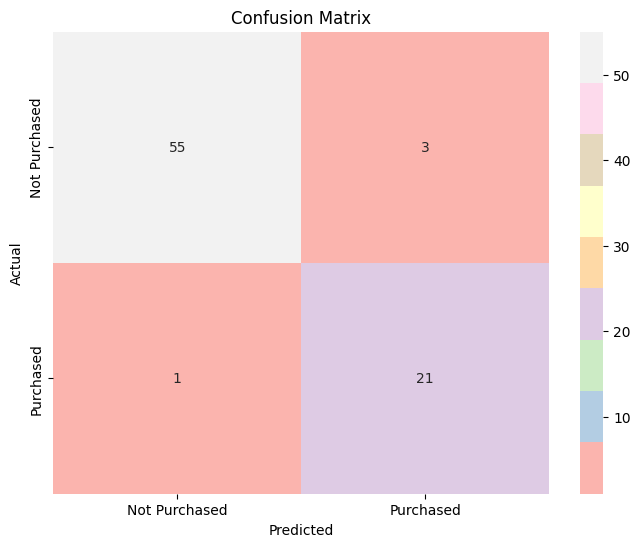

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(cm , annot=True, fmt='d',cmap='Pastel1',xticklabels=['Not Purchased','Purchased'], yticklabels=['Not Purchased','Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
mse = mean_squared_error(y_test, y_final_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.05


In [36]:
precision = precision_score(y_test, y_final_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.88


In [37]:
recall = recall_score(y_test, y_final_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.95


In [38]:
error_rate = 1 - final_accuracy
print("Error Rate:", error_rate)

Error Rate: 0.050000000000000044


In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[55  3]
 [ 1 21]]


In [40]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95
